In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob

In [2]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1, plot_clusters_online

In [81]:
save_single = False
plt.rcParams.update({'font.size': 12})

In [93]:
save_single = True
plt.rcParams.update({'font.size': 16})

# MNIST gvar

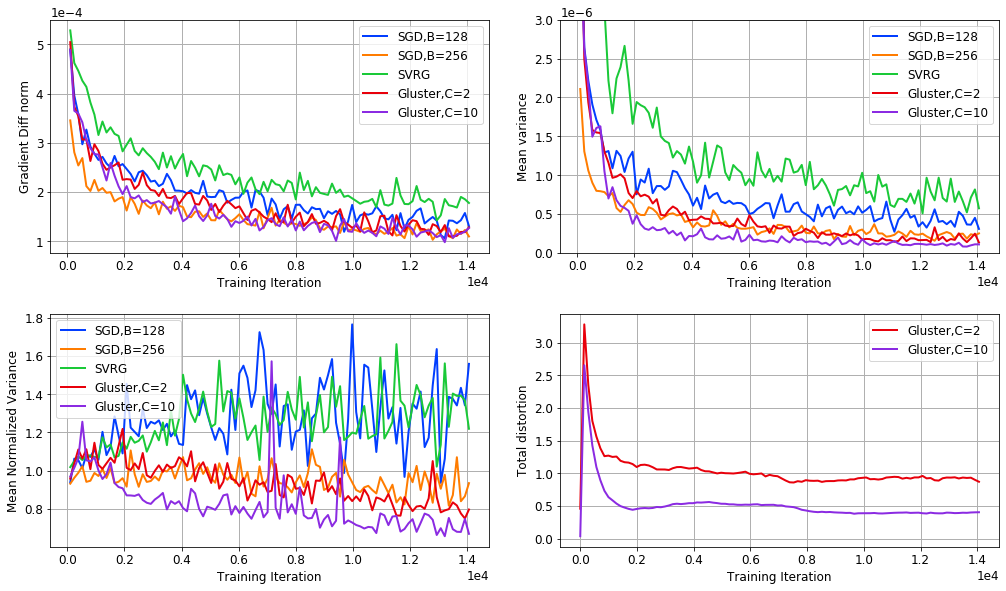

In [82]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_gvar/(.*estim_sgd|.*estim_svrg|.*nclusters_(2|10,)(.*online))']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_nipsw/mnist_gvar.png'
lg_tags = ['sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [(',batch_size_', ' B='), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

# CIFAR10 gvar

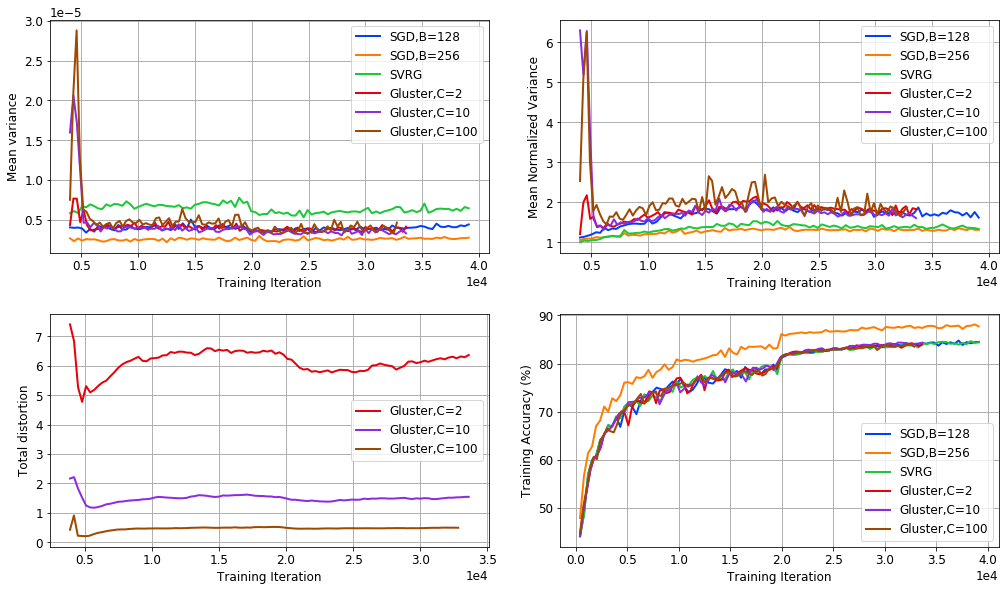

In [92]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_cnn/(.*estim_sgd|.*estim_svrg|.*nclusters_(2|10,|100,)(.*online))']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'gb_td', 'Tacc']  # 'grad_bias',
fig_name = 'figs_nipsw/cifar10_gvar_cnn.png'
lg_tags = ['sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [(',batch_size_', ' B='), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

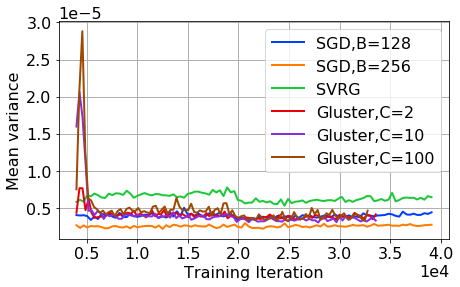

<Figure size 504x288 with 0 Axes>

In [101]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_cnn/(.*estim_sgd|.*estim_svrg|.*nclusters_(2|10,|100,)(.*online))']  # (?!.*scheduler)
tag_names = ['est_var']  # 'grad_bias',
fig_name = 'figs_nipsw/cifar10_gvar_cnn.png'
lg_tags = ['sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [(',batch_size_', ' B='), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

accuracy should be the same for all models, it is on the same trajectory

I'm going to call SGD with double mini-batch size as superSGD.
MNIST:Good: Gluster's variance is lower than superSGD. The same is true for normalize variance.Weird: SVRG's variance is higher than SGD. Normalized variance doesn't show this difference, i.e. SVRG has the same normalized variance as SGD.

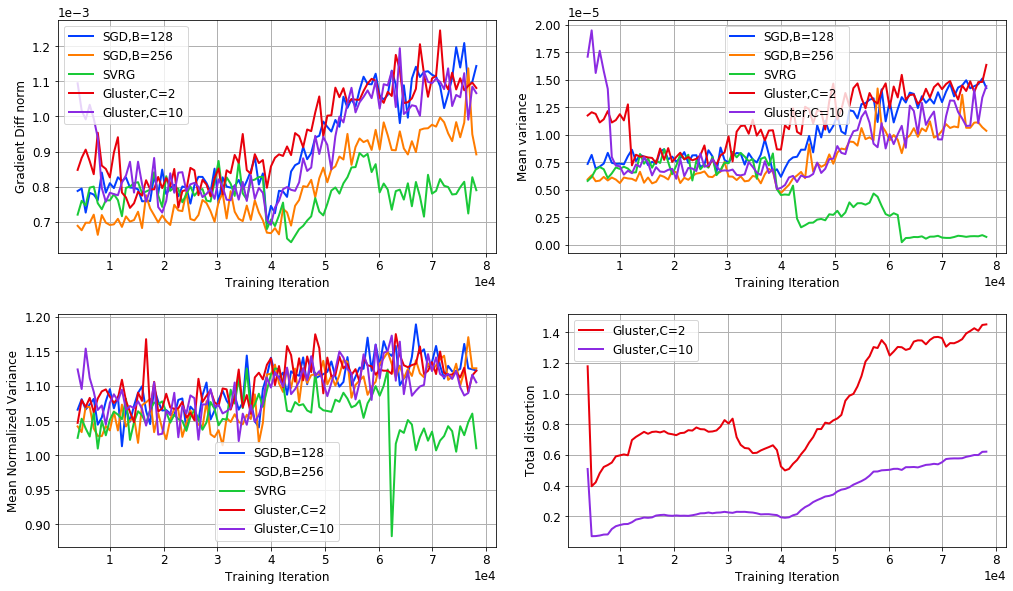

In [83]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8/(.*estim_sgd|.*estim_svrg|.*nclusters_(2|10,)(.*online))']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'gb_td']  # 'grad_bias', 
fig_name = 'figs_nipsw/cifar10_gvar_resnet8.png'
lg_tags = ['sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, None, None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [(',batch_size_', ' B='), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

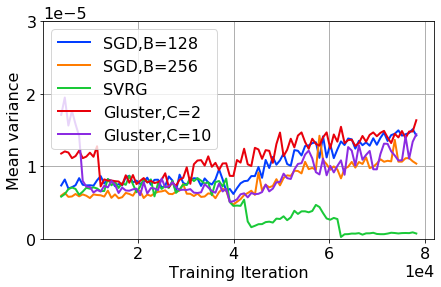

<Figure size 504x288 with 0 Axes>

In [102]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8/(.*estim_sgd|.*estim_svrg|.*nclusters_(2|10,)(.*online))']  # (?!.*scheduler)
tag_names = ['est_var']  # 'grad_bias', 
fig_name = 'figs_nipsw/cifar10_gvar_resnet8.png'
lg_tags = ['sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [[0, 3e-5], None, None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [(',batch_size_', ' B='), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

# MNIST optim

In [142]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_gvar_optim/.*lr_0.05(.*estim_sgd|.*estim_svrg|.*nclusters_.*noise_0.001(?!.*online))']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_snr', 'gb_td', 'Tacc', 'Vacc', 'Tloss', 'Vloss']
fig_name = 'figs_icml/mnist_optim.png'
lg_tags = ['sgd', 'svrg', 'gluster', 'g_nclusters', 'online', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [('sgd,bs', 'sgd bs'), ('sgd,', ''), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'bs=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

IOError: [Errno 2] No such file or directory: '/u/faghri/dmom/code/runs/runs_mnist_gvar_optim/05_lr_0.05,g_estim_gluster,g_nclusters_2,g_debug_,g_noise_0.001,gb_citers_2,g_min_size_100,gvar_start_6,g_bsnap_iter_6,g_optim_,g_optim_start_6/log.pth.tar'

[0, 2345, 4690, 7035, 9380, 11725]


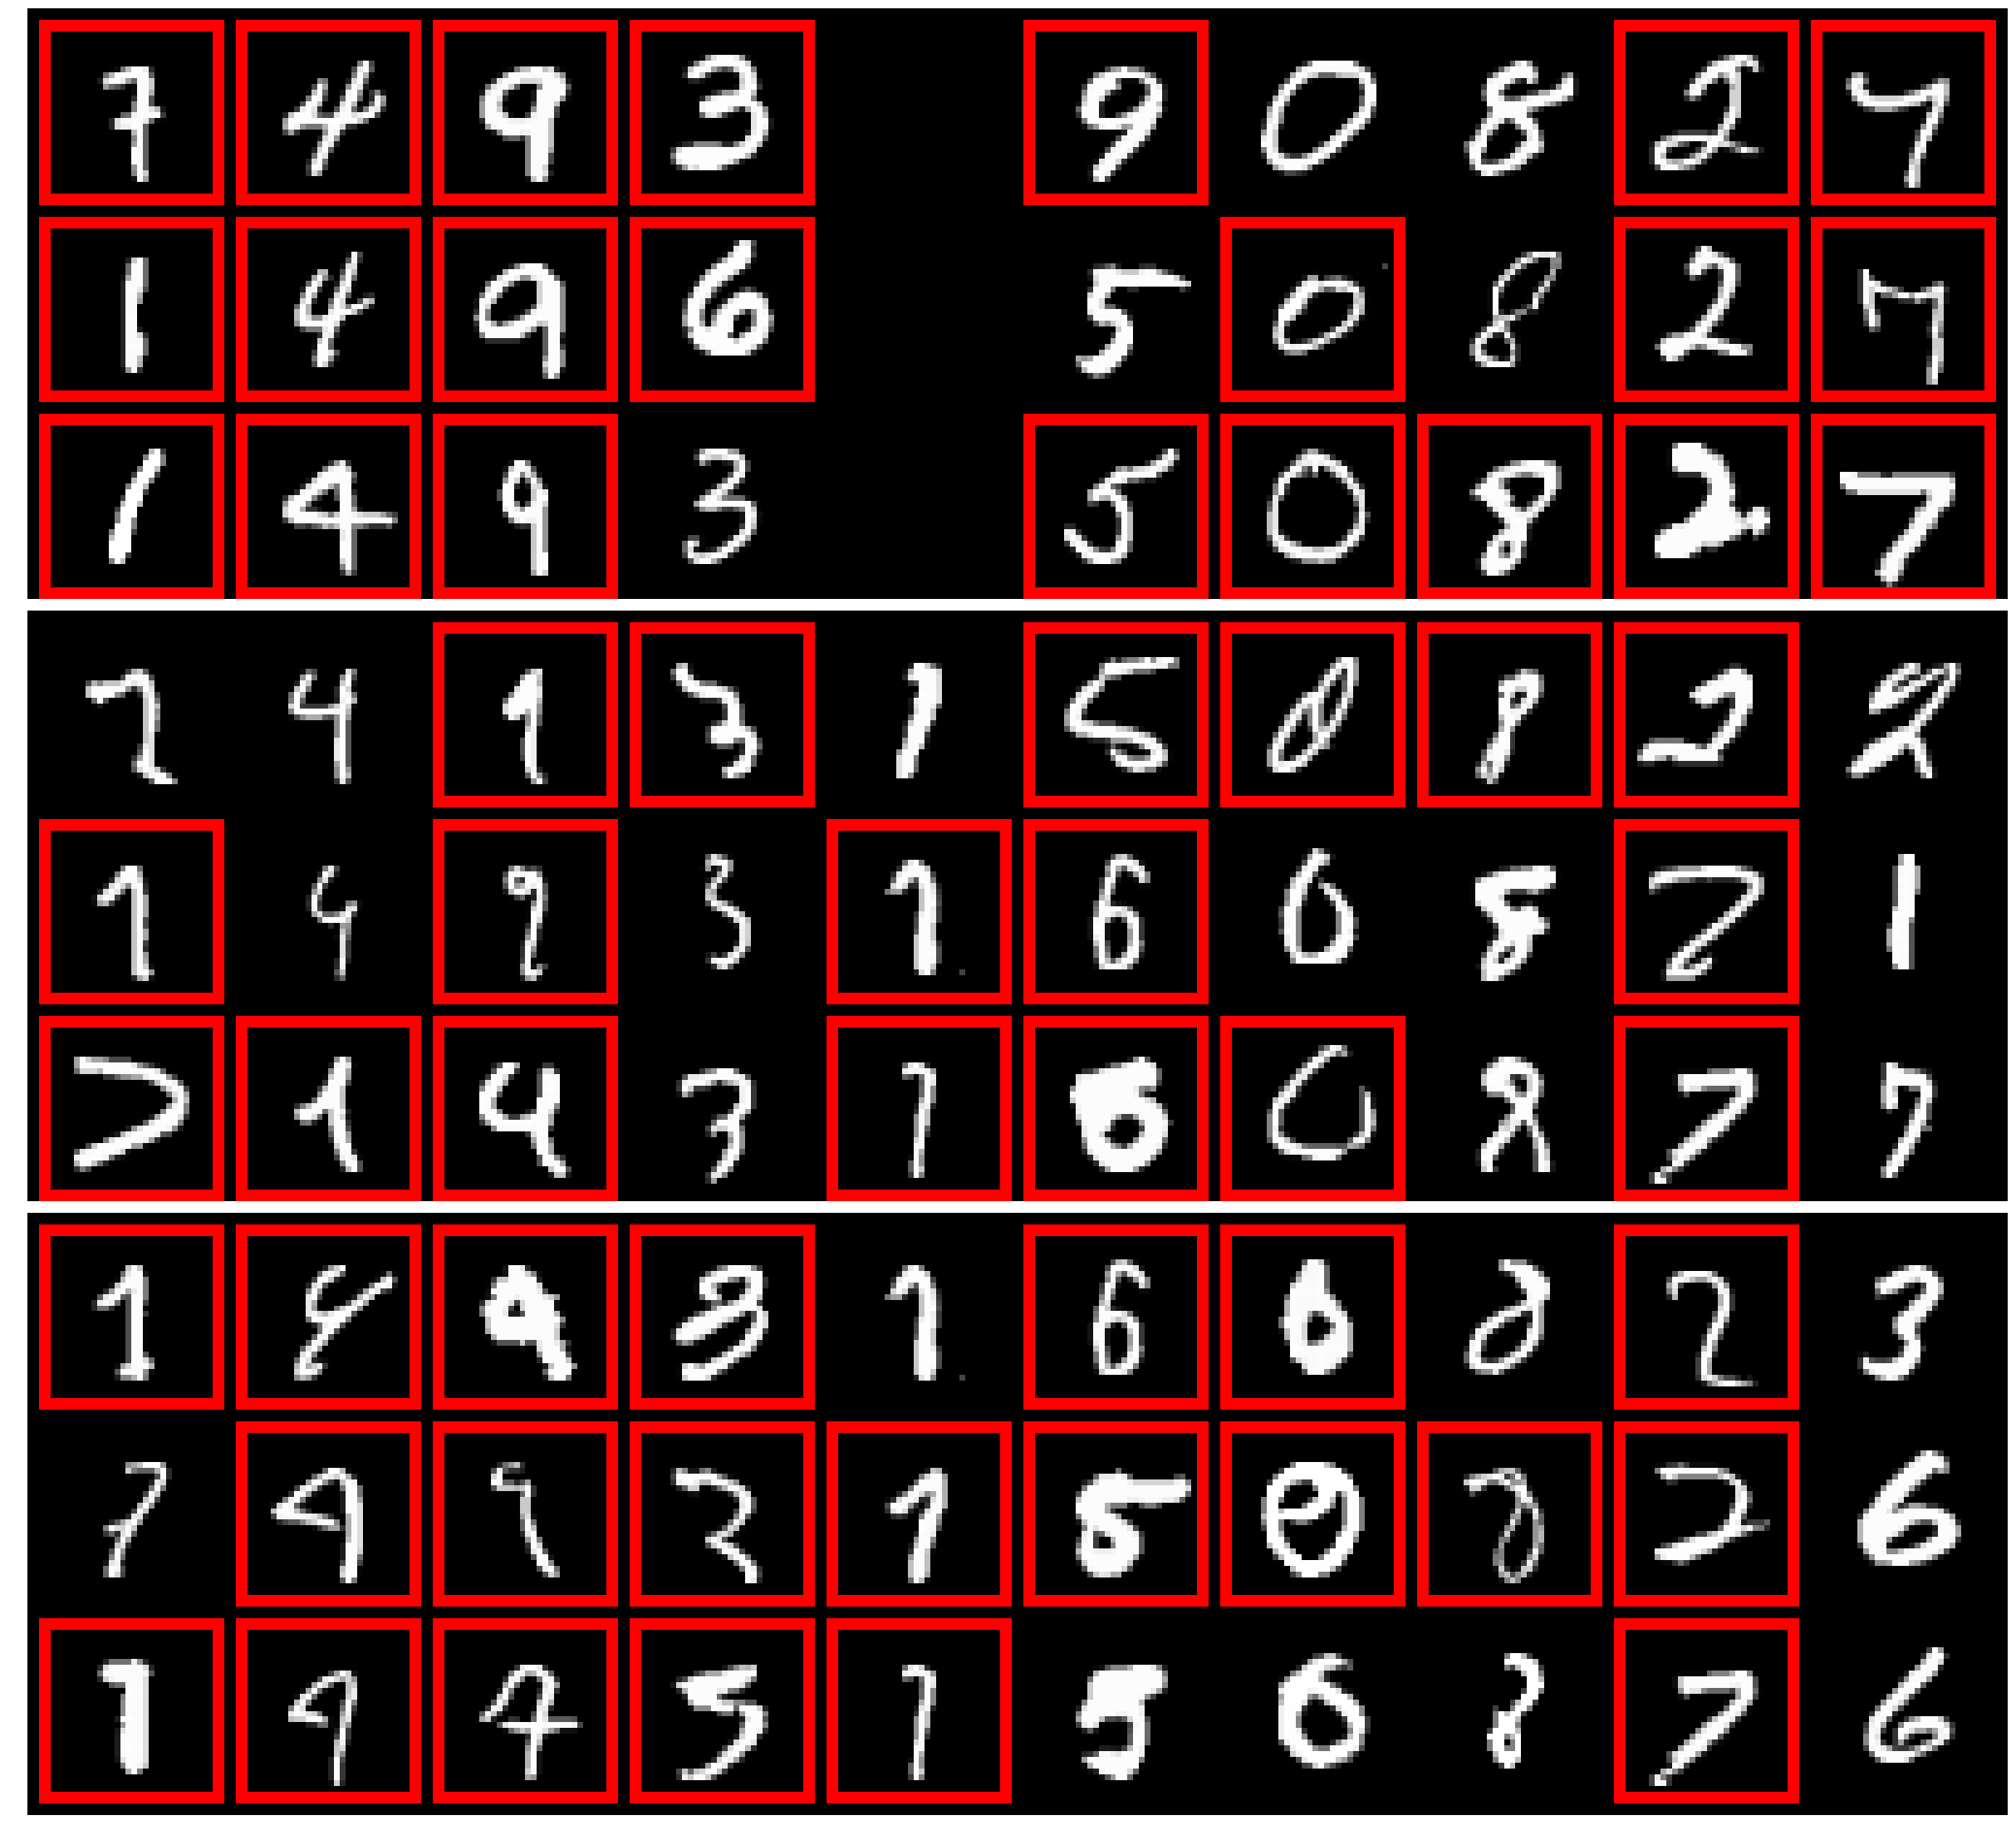

In [108]:
run_dir = '../runs/mnist_snap/'
gfname = 'checkpoint'
plot_clusters_online(run_dir, gfname, nsamples=3, iters=[0, 3, 5])

[0, 2345, 4690, 7035, 9380, 11725]


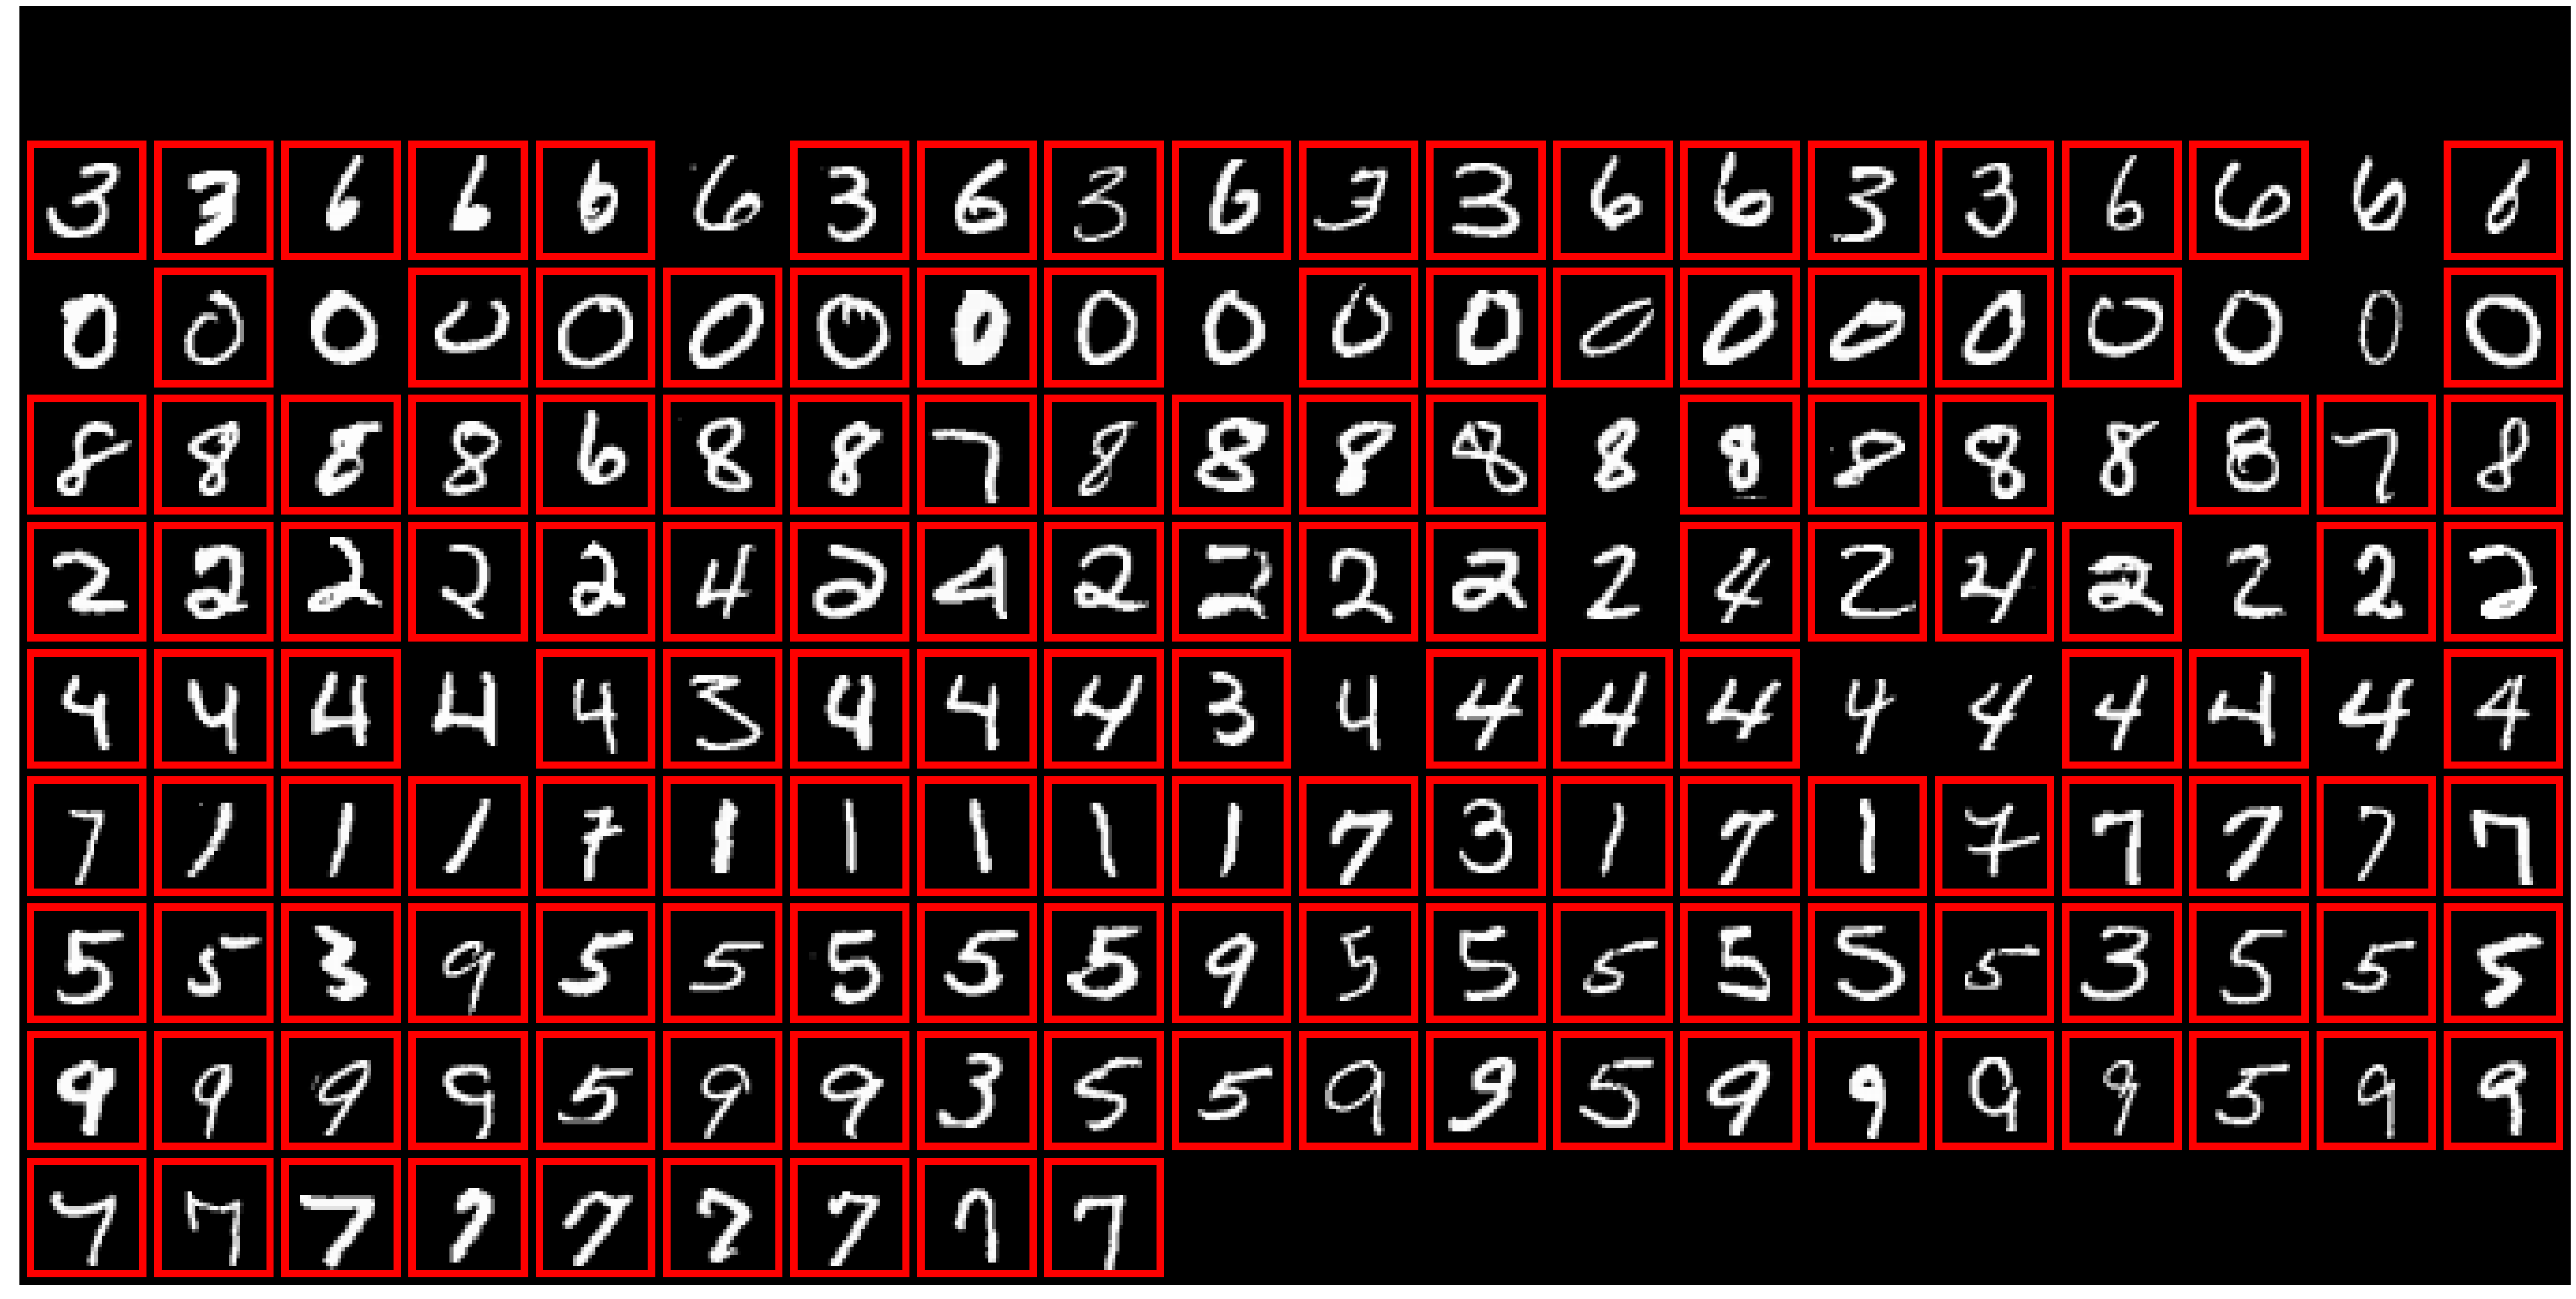

In [91]:
run_dir = '../runs/mnist_snap/'
gfname = 'checkpoint'
plot_clusters_online(run_dir, gfname, nsamples=20, iters=[0])

[0, 2345, 4690, 7035, 9380, 11725]


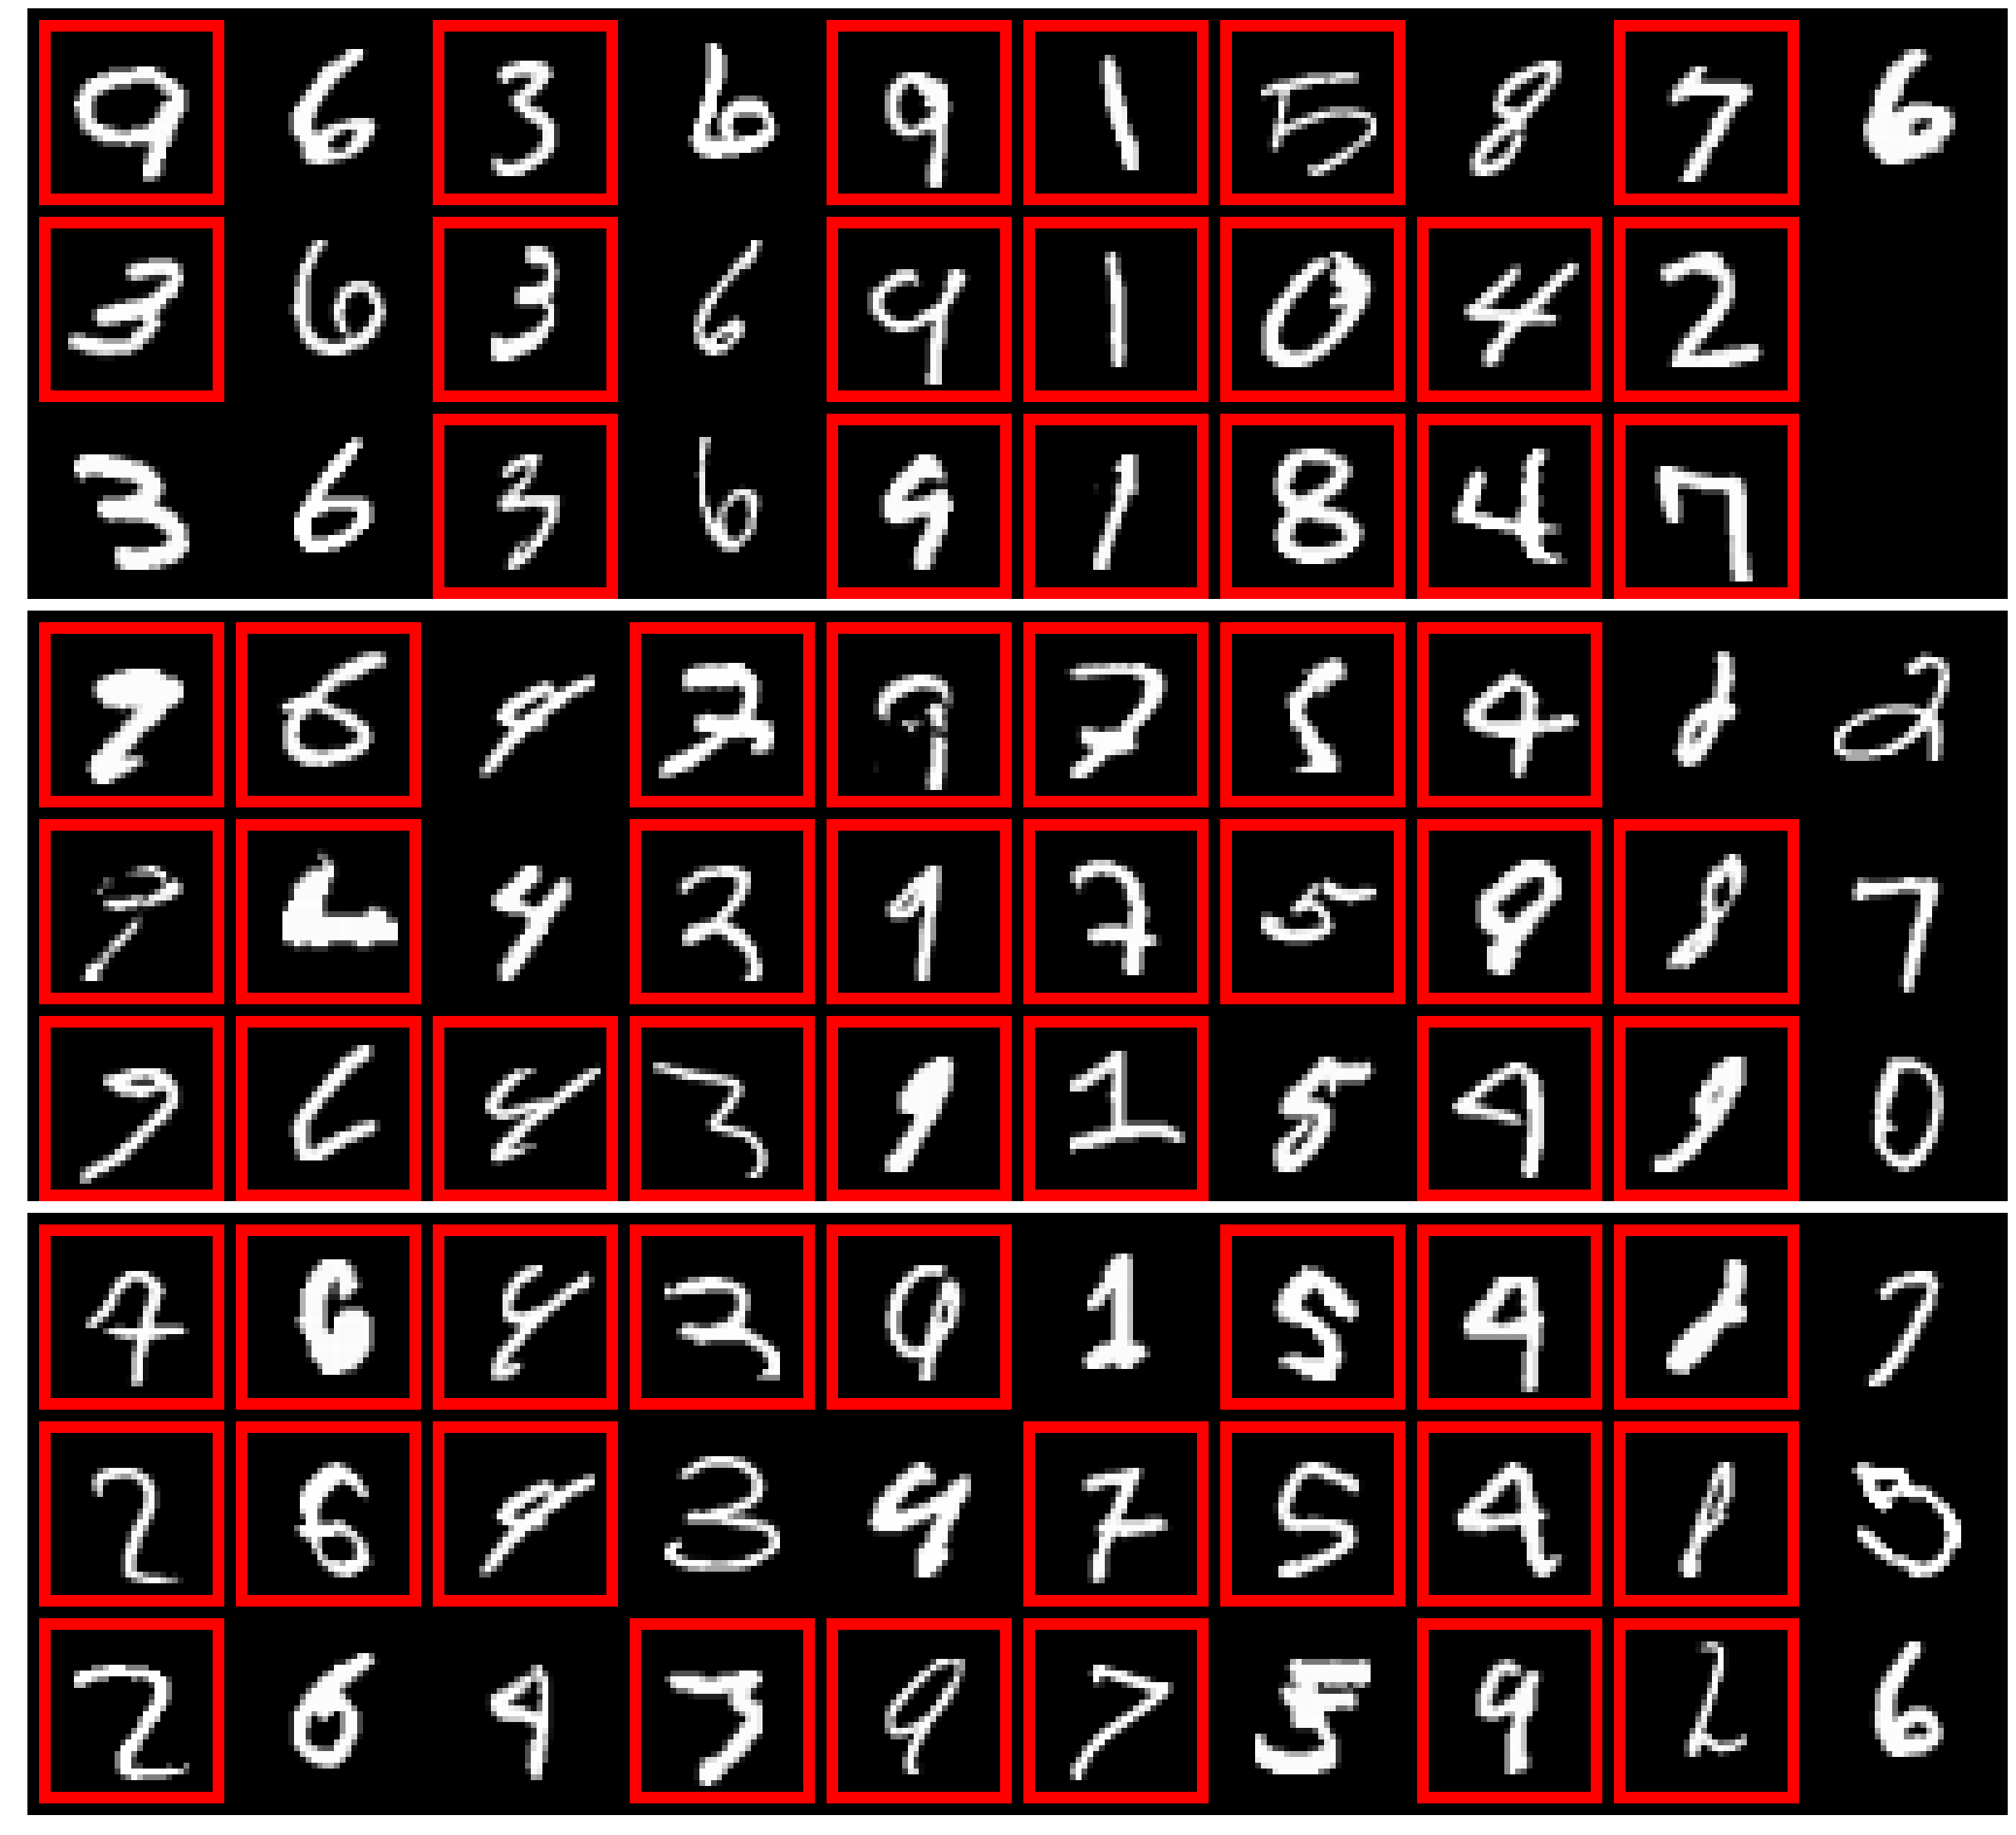

In [133]:
run_dir = '../runs/mnist_adam_snap/'
gfname = 'checkpoint'
plot_clusters_online(run_dir, gfname, nsamples=3, iters=[0, 3, 5])